In [13]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

In [2]:
data = pd.read_csv('test.csv')

In [3]:
data.head()

,Unnamed: 0,card_transaction_id,member_role,time_settled,local_amount_currency,price_plan_subgroup_at_time,legal_country,card_id,card_level_name,is_physical,payment_method,reading_method_group_name,counterparty_country_code,movement_amount_euros,is_fraud,time_settled_diff,time_settled_diff2
0,372474,210810b7-a5b9-4589-8bde-44901f6ca08b,owner,2022-01-26 20:38:35.606157,EUR,solo_basic,FR,441e3131-64ec-403a-bc4d-06a966dc30da,physical_one,True,non applicable,Other,IE,-0.39,0,80801,81087
1,568756,d5536a7f-c27a-4d54-871a-afb70cb5e7a4,owner,2022-12-02 17:58:16.532703,EUR,team_essential,FR,d6aef5de-719c-467c-9f57-1f6f8e7f2b90,physical_one,True,non applicable,Other,IE,-5.56,0,80801,81087
2,367096,d4b58166-48fe-40a1-b6da-ce96a4de8fb7,owner,2022-08-19 16:32:14.966736,USD,solo_basic,IT,f4b90919-2dc0-4b63-b38c-d048aebd88bb,physical_one,True,online,VAD,IE,19.85,1,80801,81087
3,293504,ef1c94c4-3e64-4dd6-b3f8-de6eee3987d0,owner,2022-08-19 16:42:26.244328,VND,solo_basic,IT,f4b90919-2dc0-4b63-b38c-d048aebd88bb,physical_one,True,online,VAD,IE,894.17,1,611,81087
4,92,f88d66e4-3f33-4bc1-9ca4-fc08797c492a,owner,2022-08-19 16:42:58.628298,VND,solo_basic,IT,f4b90919-2dc0-4b63-b38c-d048aebd88bb,physical_one,True,online,VAD,IE,1061.53,1,32,643


In [4]:
data['is_fraud'].value_counts()

is_fraud
0    585911
1      1392
Name: count, dtype: int64

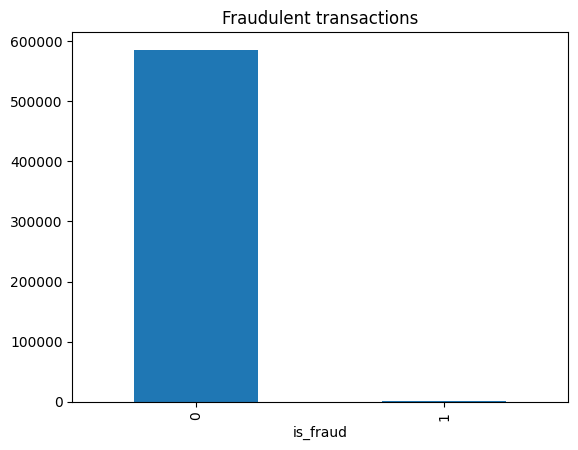

In [5]:
plot = data['is_fraud'].value_counts().plot(kind='bar', title='Fraudulent transactions')
plt.show()

In [6]:
data['time_settled'] = pd.to_datetime(data['time_settled'])
total_transactions = data.shape[0]
fraud_transactions = data['is_fraud'].sum()
proportion_fraud = fraud_transactions / total_transactions
average_fraud_amount = data[data['is_fraud'] == 1]['movement_amount_euros'].mean()
average_non_fraud_amount = data[data['is_fraud'] == 0]['movement_amount_euros'].mean()
data['hour'] = data['time_settled'].dt.hour
fraud_hourly_distribution = data[data['is_fraud'] == 1]['hour'].value_counts().sort_index()
non_fraud_hourly_distribution = data[data['is_fraud'] == 0]['hour'].value_counts().sort_index()
print("Total number of transactions:", total_transactions)
print("Proportion of fraudulent transactions:", proportion_fraud)
print("Average amount of fraudulent transactions (€):", average_fraud_amount)
print("Average amount of non-fraudulent transactions (€):", average_non_fraud_amount)
print("\nFraudulent transactions hourly distribution:")
print(fraud_hourly_distribution)
print("\nNon-fraudulent transactions hourly distribution:")
print(non_fraud_hourly_distribution)

Total number of transactions: 587303
Proportion of fraudulent transactions: 0.0023701564609749995
Average amount of fraudulent transactions (€): 585.6158333333333
Average amount of non-fraudulent transactions (€): 261.5917433705802

Fraudulent transactions hourly distribution:
hour
10      1
16    186
17    595
18    419
19    112
20     43
21     14
22     20
23      2
Name: count, dtype: int64

Non-fraudulent transactions hourly distribution:
hour
0       1753
1        497
2        128
3         99
7         90
8        309
9        894
10      1142
11       406
12        14
14        27
15       505
16     63771
17    177522
18    156740
19     69578
20     43512
21     36343
22     23277
23      9304
Name: count, dtype: int64


In [7]:
fig = go.Figure()
fig.add_trace(go.Bar(x=fraud_hourly_distribution.index, y=fraud_hourly_distribution.values, name='Fraudulent transactions'))
fig.add_trace(go.Bar(x=non_fraud_hourly_distribution.index, y=non_fraud_hourly_distribution.values, name='Non-fraudulent transactions'))
fig.update_layout(title='Hourly distribution of fraudulent and non-fraudulent transactions', xaxis_title='Hour', yaxis_title='Number of transactions')
fig.show()


In [16]:
fraudulent_transactions = data[data['is_fraud'] == 1]['movement_amount_euros']
plot_data = pd.DataFrame({
    "Transaction Amount (€)": fraudulent_transactions,
    "Type": ['Fraudulent'] * len(fraudulent_transactions)
})

fig = px.histogram(plot_data, 
                   x="Transaction Amount (€)", 
                   color="Type",
                   nbins=50,  
                   title="Distribution of Transaction Amounts: Fraud",
                   color_discrete_map={"Fraudulent": "red", "Non-Fraudulent": "blue"})

fig.update_layout(
    xaxis_title="Transaction Amount (€)",
    yaxis_title="Frequency",
    legend_title="Transaction Type"
)

fig.show()

counterparty_country_code
CA    0.013333
IE    0.002636
US    0.000575
Name: is_fraud, dtype: float64


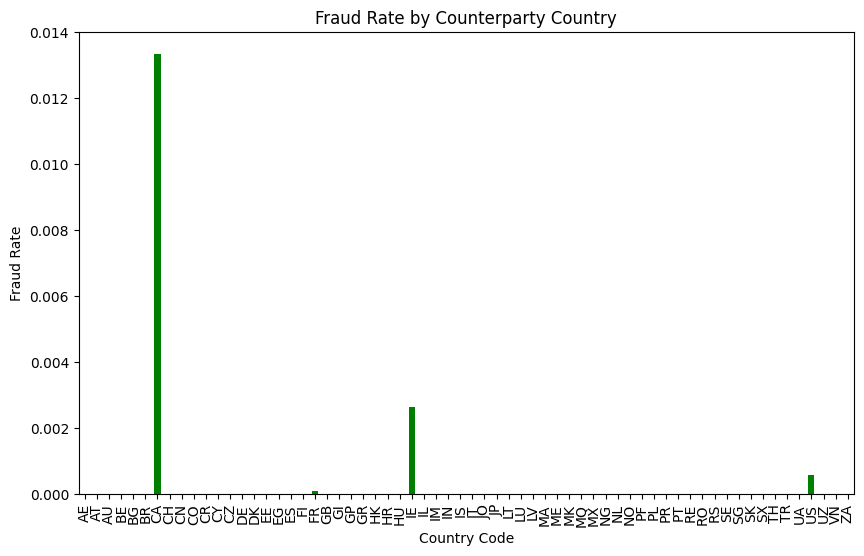

In [20]:
fraud_rate_by_country1 = data.groupby('counterparty_country_code')['is_fraud'].mean()
thereshold = 0.0001
fraud_rate_by_country = fraud_rate_by_country1[fraud_rate_by_country1 > thereshold]
print(fraud_rate_by_country)
plt.figure(figsize=(10, 6))
fraud_rate_by_country1.plot(kind='bar', color='green')
plt.title('Fraud Rate by Counterparty Country')
plt.xlabel('Country Code')
plt.ylabel('Fraud Rate')
plt.show()
